In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_08_1week.csv")
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1627862426,45.651464,25.615426,538,612
1,1627862486,45.651464,25.615426,538,610
2,1627862546,45.651464,25.615426,538,606
3,1627862606,45.651464,25.615426,538,609
4,1627862666,45.651464,25.615426,538,606


In [4]:
dataframe_size = len(dataframe.index)
dataframe_size

10070

In [5]:
train = dataframe[dataframe.index < dataframe_size*(1/2)]
test = dataframe[dataframe.index >= dataframe_size*(1/2)]

In [6]:
y_train = train['co2']
y_train

0       612
1       610
2       606
3       609
4       606
       ... 
5030    428
5031    430
5032    431
5033    428
5034    424
Name: co2, Length: 5035, dtype: int64

In [7]:
y_test = test['co2']
y_test

5035     427
5036     415
5037     412
5038     413
5039     413
        ... 
10065    588
10066    589
10067    587
10068    587
10069    586
Name: co2, Length: 5035, dtype: int64

In [8]:
x_train = train['time']
x_train

0       1627862426
1       1627862486
2       1627862546
3       1627862606
4       1627862666
           ...    
5030    1628164211
5031    1628164272
5032    1628164331
5033    1628164391
5034    1628164451
Name: time, Length: 5035, dtype: int64

In [9]:
x_test = test['time']
x_test

5035     1628164511
5036     1628164571
5037     1628164631
5038     1628164691
5039     1628164751
            ...    
10065    1628466932
10066    1628466992
10067    1628467052
10068    1628467112
10069    1628467172
Name: time, Length: 5035, dtype: int64

In [10]:
# Convert to numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

x_test

array([[1628164511],
       [1628164571],
       [1628164631],
       ...,
       [1628467052],
       [1628467112],
       [1628467172]], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600)


# from sklearn.ensemble import GradientBoostingRegressor
# all_models = {}
# common_params = dict(
#     learning_rate=0.05,
#     n_estimators=200,
#     max_depth=2,
#     min_samples_leaf=9,
#     min_samples_split=9,
# )
# for alpha in [0.05, 0.5, 0.95]:
#     gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
#     all_models["q %1.2f" % alpha] = gbr.fit(x_train, y_train)
# clf = GradientBoostingRegressor(loss="quantile", **common_params)


# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor
# rng = np.random.RandomState(1)
# clf = AdaBoostRegressor( DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

# from sklearn.linear_model import ARDRegression
# clf = ARDRegression(compute_score=True)#, n_iter=500, alpha_1=10, alpha_2=10, lambda_1=10, lambda_2=10)

# from sklearn.isotonic import IsotonicRegression
# clf = IsotonicRegression()

In [25]:
clf.fit(x_train, y_train)

C:\Users\Valentin.Adam\AppData\Local\Temp\ipykernel_17676\3292451027.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestRegressor(max_depth=55, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=6, n_estimators=600)

In [26]:
# clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([432.25429504, 432.25429504, 432.25429504, ..., 432.25429504,
       432.25429504, 432.25429504])

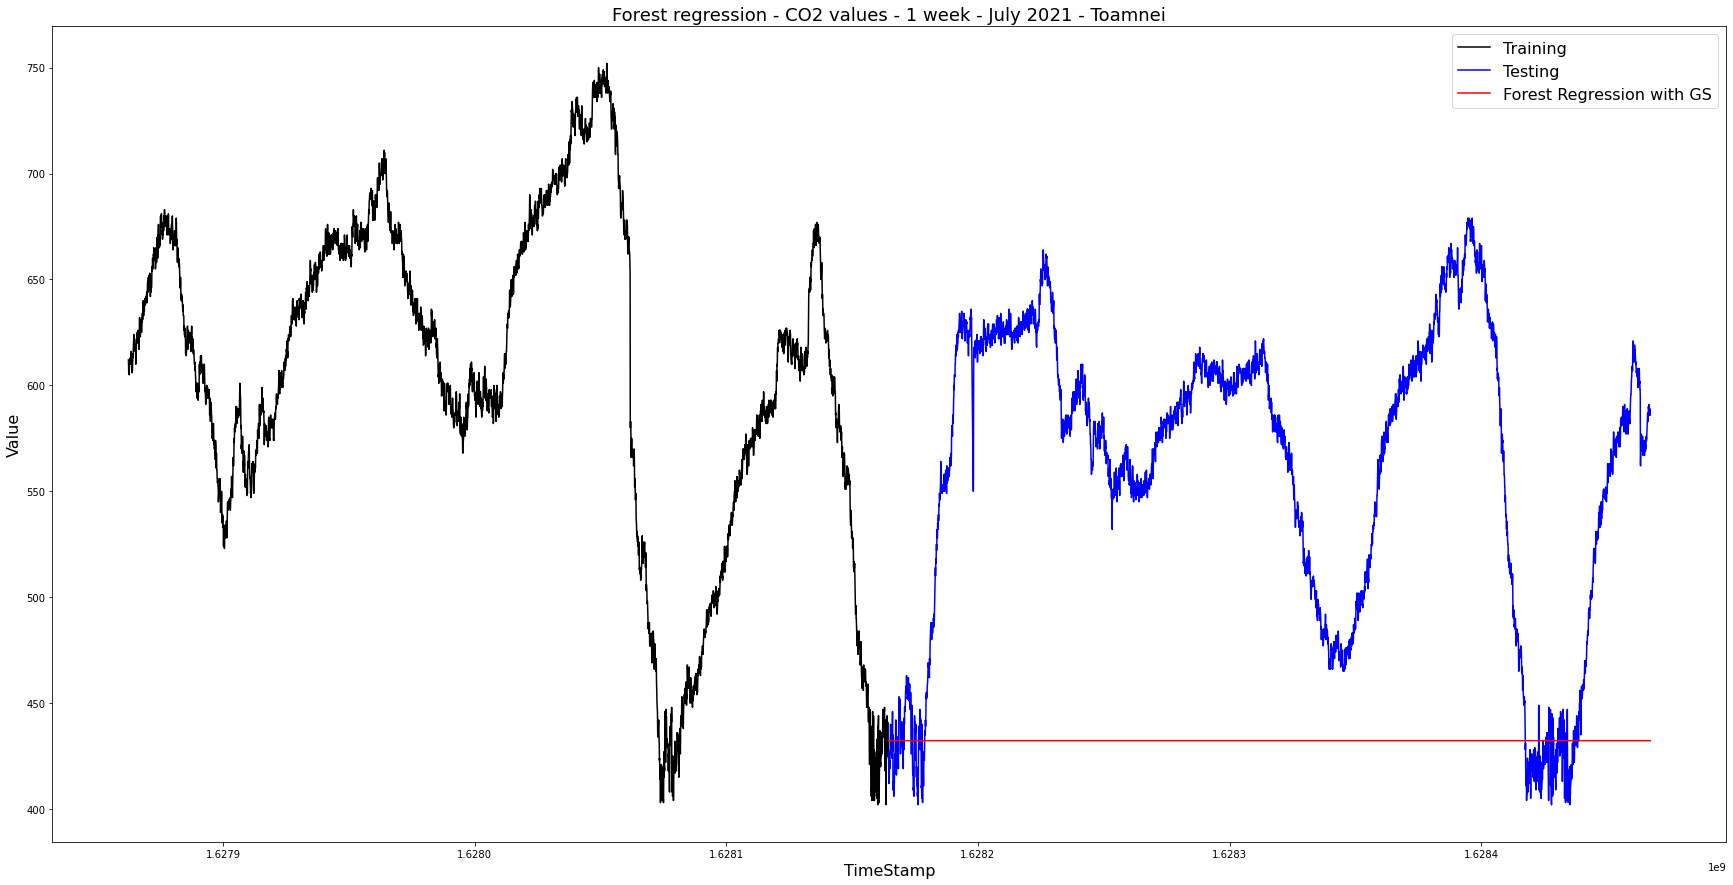

In [27]:
plt.figure(figsize=(30,15))
plt.plot(x_train, y_train, color = 'black', label= 'Training')
plt.plot(x_test, y_test, color = 'blue', label = 'Testing')
plt.plot(x_test, y_pred, color = 'red', label = 'Forest Regression with GS')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('Forest regression - CO2 values - 1 week - July 2021 - Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_ARD.jpg', bbox_inches = 'tight')
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-3.437074932566728

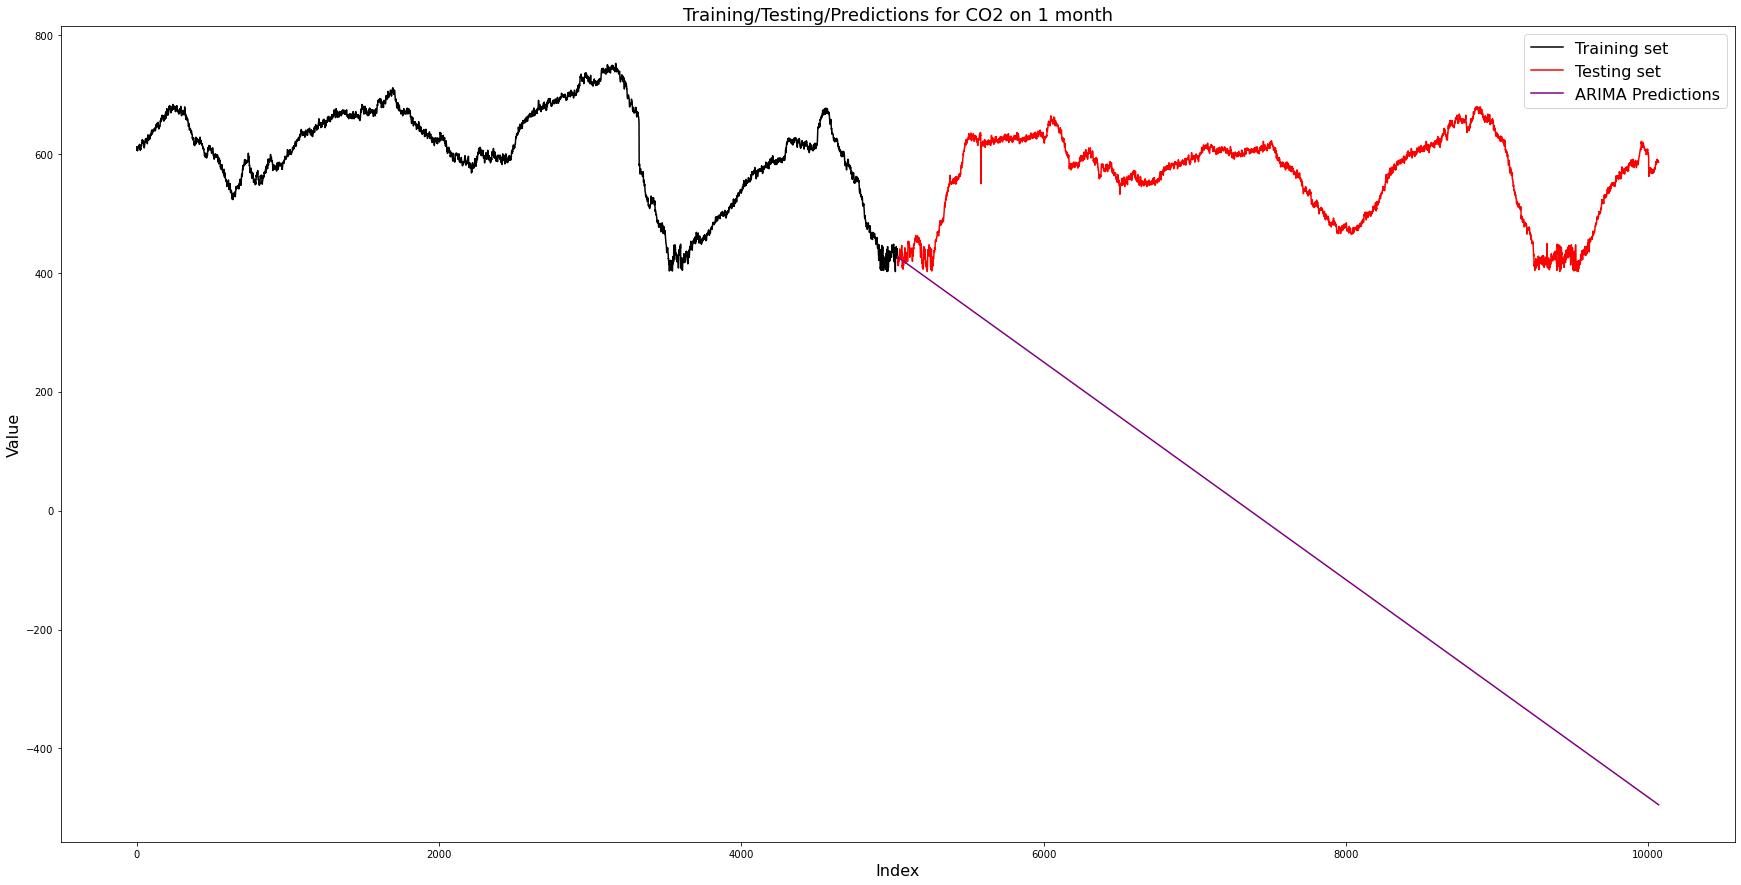

RMSE:  651.6556506568795


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# y = train['pm10']
y = train['co2']

ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for PM10 on 1 month", fontsize=18)
plt.title("Training/Testing/Predictions for CO2 on 1 month", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/CSV_Tests_1month_ARIMA', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

# arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
arima_rmse2 = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

In [30]:
from sklearn.metrics import r2_score
r2_score(test["co2"].values, y_pred_df["Predictions"])

-86.86685139265776